In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from '/Users/tomas/PycharmProjects/uib-machine-learning/assignment-2/src/util.py'>

In [5]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

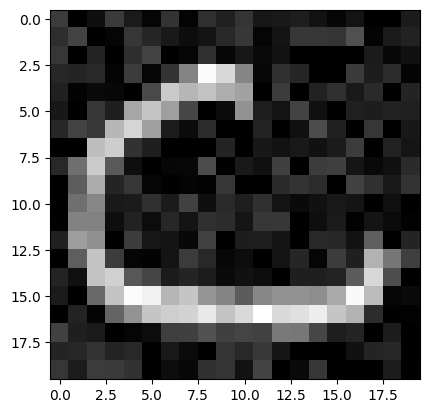

In [25]:
# visualize a number
utils.visualize_image(X[2])

In [16]:
utils.translate_label_to_class(16)

'EMPTY'

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a scikit-learn pipeline for a basic CNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('classifier', MLPClassifier(max_iter=200))  # MLPClassifier as a basic CNN
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__hidden_layer_sizes': [(64,), (128,), (256,)],
    'classifier__alpha': [0.0001, 0.001, 0.01],
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")


Test accuracy: 0.957747785353184


In [26]:
best_model.predict(X_test[2].reshape(1, -1))


array([9], dtype=uint8)